In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.regularizers import l2
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, UpSampling2D
from keras.applications.resnet_v2 import decode_predictions
from skimage.transform import resize
import matplotlib.pyplot as plt

2022-03-24 12:10:21.360488: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 12:10:21.360516: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

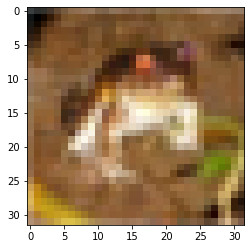

In [43]:
plt.imshow(X_train[0])

In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [36]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


## Some funcion to plot results

In [45]:
def plot_results(history):    
    # summarize history for accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

## Basic model

In [106]:
model = Sequential([
    tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5)),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [107]:
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    batch_size=128
)

Epoch 1/15
391/391 [==============================] - 4s 8ms/step - loss: 1.8444 - accuracy: 0.3493 - val_loss: 1.8313 - val_accuracy: 0.3559
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6346 - accuracy: 0.4176 - val_loss: 1.6852 - val_accuracy: 0.3975
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5624 - accuracy: 0.4471 - val_loss: 1.5758 - val_accuracy: 0.4400
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.5274 - accuracy: 0.4565 - val_loss: 1.5235 - val_accuracy: 0.4468
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.4929 - accuracy: 0.4712 - val_loss: 1.5609 - val_accuracy: 0.4414
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4677 - accuracy: 0.4769 - val_loss: 1.6510 - val_accuracy: 0.4179
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.4455 - accuracy: 0.4850 - val_loss: 1.6692 - val_accuracy: 0.4043
Epoch 

### Best result was around 50% accuracy on validation data

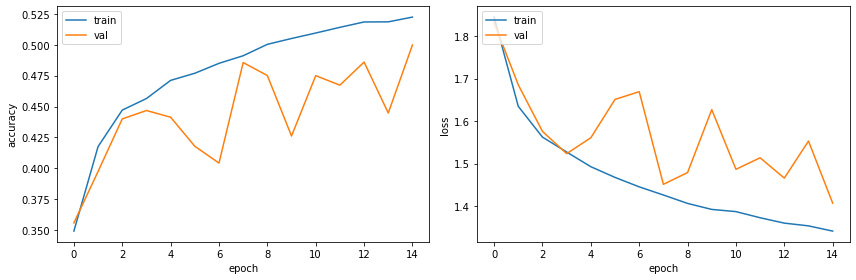

In [108]:
plot_results(history)

## CNN

In [111]:
cnn = Sequential([
    tf.keras.layers.Conv2D(input_shape=X_train.shape[1:],
                           filters=32,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5))
])

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [112]:
cnn_history = cnn.fit(
    X_train,
    y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    batch_size=128
)

Epoch 1/15
391/391 [==============================] - 49s 122ms/step - loss: 1.5359 - accuracy: 0.4545 - val_loss: 1.2354 - val_accuracy: 0.5560
Epoch 2/15
391/391 [==============================] - 47s 121ms/step - loss: 1.0877 - accuracy: 0.6169 - val_loss: 1.0198 - val_accuracy: 0.6455
Epoch 3/15
391/391 [==============================] - 47s 120ms/step - loss: 0.9400 - accuracy: 0.6725 - val_loss: 0.9707 - val_accuracy: 0.6568
Epoch 4/15
391/391 [==============================] - 47s 121ms/step - loss: 0.8465 - accuracy: 0.7055 - val_loss: 0.9307 - val_accuracy: 0.6809
Epoch 5/15
391/391 [==============================] - 48s 122ms/step - loss: 0.7815 - accuracy: 0.7318 - val_loss: 0.8892 - val_accuracy: 0.6981
Epoch 6/15
391/391 [==============================] - 48s 122ms/step - loss: 0.7167 - accuracy: 0.7537 - val_loss: 0.8960 - val_accuracy: 0.6921
Epoch 7/15
391/391 [==============================] - 49s 126ms/step - loss: 0.6650 - accuracy: 0.7728 - val_loss: 0.9015 - val_ac

### Overfitted but still over 20% accuracy improvement compared to basic model (best epochs more than 71%)

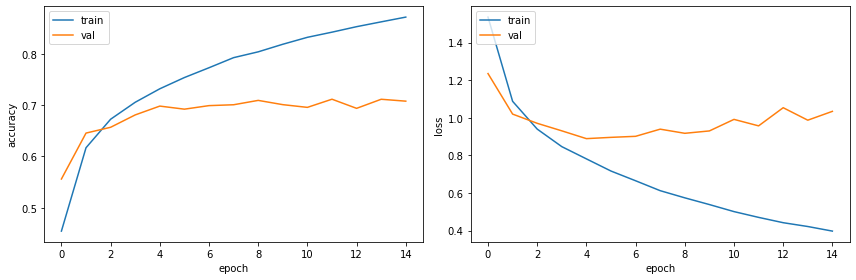

In [113]:
plot_results(cnn_history)

## Transfer Learning

In [92]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [93]:
X_train = tf.keras.applications.resnet_v2.preprocess_input(X_train.astype('float32'))
X_test = tf.keras.applications.resnet_v2.preprocess_input(X_test.astype('float32'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


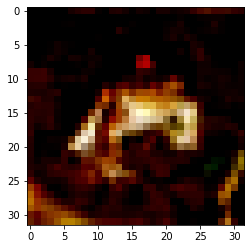

In [94]:
plt.imshow(X_train[0])

In [95]:
inputs = tf.keras.layers.Input(shape=(32, 32, 3))
resized = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

res_net = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)(resized)

x = tf.keras.layers.GlobalAveragePooling2D()(res_net)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5))(x),
outputs = tf.keras.layers.Dense(10, activation='softmax',
                          kernel_regularizer=l2(1e-5),
                          bias_regularizer=l2(1e-5))(x[0])

In [96]:
trans_model = Model(inputs=inputs, outputs=outputs)
trans_model.layers[2].trainable = False

In [97]:
trans_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [98]:
trans_history = trans_model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_data=(X_test, y_test),
    batch_size=256
)

196/196 [==============================] - 6694s 34s/step - loss: 0.3729 - accuracy: 0.8787 - val_loss: 0.3012 - val_accuracy: 0.9012


### Best result with ~90% valid accuracy, sample prediction:

1/1 [==============================] - 0s 141ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'airplane')

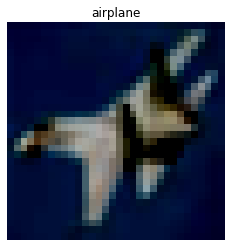

In [137]:
pred = trans_model.predict(X_test[10:11])
result = np.where(pred == np.amax(pred))

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
pred = classes[result[1][0]]

plt.imshow(X_test[10])
plt.axis('off')
plt.title(pred)
